In [71]:
#part - 1

In [72]:
#none of the information in your sample data has any colour specification or indeed any presentation information at all its a chunk of json data that appears to be an error message of some form

In [70]:
# suspect you need to look at extractly where you got the data from the app is applying colours to the data and there is nonthing in there that in isolation allows you to extract it based on that applied colour

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\chrome_reviews.csv')

In [3]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [4]:
df.shape

(7204, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [6]:
df.columns

Index(['ID', 'Review URL', 'Text', 'Star', 'Thumbs Up', 'User Name',
       'Developer Reply', 'Version', 'Review Date', 'App ID'],
      dtype='object')

In [7]:
df['Text'].unique()

array(['This is very helpfull aap.', 'Good',
       'Not able to update. Neither able to uninstall.', ...,
       'Bad version 😔',
       "One thing that I have to say I can't spelled to good but I don't have any problem try to spell to my best",
       'After update it lag and always slow same goes to googleee ;)))))) !!!! I want to do my work but 🌚'],
      dtype=object)

In [8]:
# its a regression problem so use machine learning models 

In [9]:
df.isnull().sum()

ID                    0
Review URL            0
Text                  1
Star                  0
Thumbs Up             0
User Name             0
Developer Reply    7109
Version              85
Review Date           0
App ID                0
dtype: int64

In [10]:
df.dtypes

ID                  int64
Review URL         object
Text               object
Star                int64
Thumbs Up           int64
User Name          object
Developer Reply    object
Version            object
Review Date        object
App ID             object
dtype: object

In [11]:
# so remove null values

In [12]:
df['Version'].fillna(df['Version'].mode()[0],inplace=True)

In [13]:
df['Developer Reply'].fillna(df['Developer Reply'].mode()[0],inplace=True)

In [14]:
df['Text'].fillna(df['Text'].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

ID                 0
Review URL         0
Text               0
Star               0
Thumbs Up          0
User Name          0
Developer Reply    0
Version            0
Review Date        0
App ID             0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [18]:
df.dtypes

ID                 int64
Review URL         int32
Text               int32
Star               int64
Thumbs Up          int64
User Name          int32
Developer Reply    int32
Version            int32
Review Date        int32
App ID             int32
dtype: object

In [19]:
df.describe()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
count,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.0
mean,3601.500000,3601.500000,2260.164076,2.592726,0.133259,3525.096197,80.531094,87.281233,32.234175,0.0
std,2079.760002,2079.760002,1365.293610,1.728362,1.607894,2060.959281,5.031154,24.459790,19.981520,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1800.750000,1800.750000,992.000000,0.000000,0.000000,1739.750000,81.000000,80.000000,15.000000,0.0
50%,3601.500000,3601.500000,2299.500000,4.000000,0.000000,3526.500000,81.000000,98.000000,32.000000,0.0
75%,5402.250000,5402.250000,3393.250000,4.000000,0.000000,5306.250000,81.000000,102.000000,49.000000,0.0
max,7203.000000,7203.000000,4794.000000,4.000000,37.000000,7098.000000,88.000000,110.000000,67.000000,0.0


In [20]:
#EDA

In [21]:
import seaborn as sns 

In [22]:
import matplotlib.pyplot as plt

In [23]:
df.corr()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
ID,1.000000,0.004145,0.014619,-0.001087,0.008271,-0.003320,-0.038870,0.096362,0.999476,NaN
Review URL,0.004145,1.000000,0.005340,0.012897,0.002192,0.010850,-0.018379,0.006245,0.003883,NaN
Text,0.014619,0.005340,1.000000,-0.059687,0.012351,0.031326,-0.014848,-0.010161,0.014769,NaN
Star,-0.001087,0.012897,-0.059687,1.000000,-0.041165,0.015405,0.104610,-0.112994,-0.000526,NaN
Thumbs Up,0.008271,0.002192,0.012351,-0.041165,1.000000,-0.029001,-0.026564,0.054334,0.008332,NaN
User Name,-0.003320,0.010850,0.031326,0.015405,-0.029001,1.000000,0.037688,0.021276,-0.003137,NaN
Developer Reply,-0.038870,-0.018379,-0.014848,0.104610,-0.026564,0.037688,1.000000,-0.027912,-0.038675,NaN
Version,0.096362,0.006245,-0.010161,-0.112994,0.054334,0.021276,-0.027912,1.000000,0.095272,NaN
Review Date,0.999476,0.003883,0.014769,-0.000526,0.008332,-0.003137,-0.038675,0.095272,1.000000,NaN
App ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


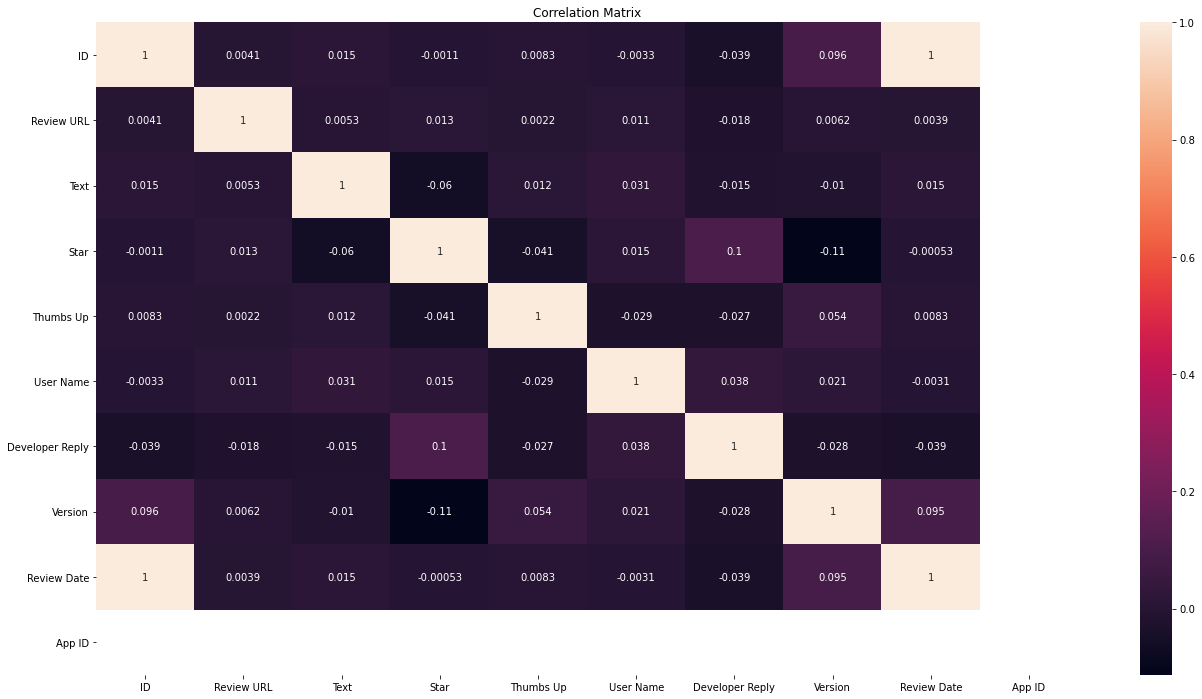

In [24]:
plt.figure(figsize=[22,12])
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

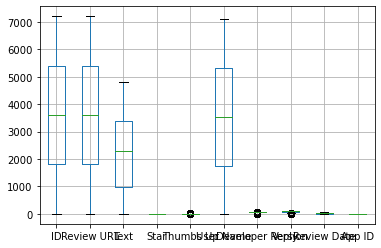

In [25]:
df.boxplot()

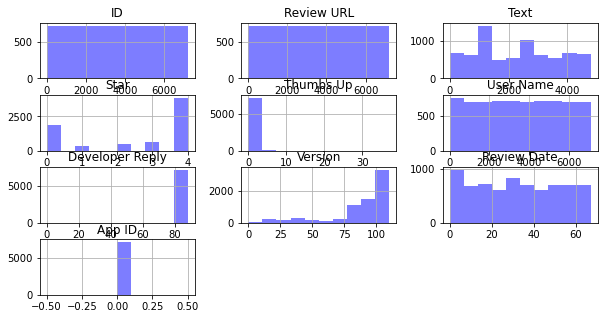

In [26]:
df.hist(color = 'b',alpha = 0.51, figsize=(10,5))
plt.show()

In [27]:
x = df.drop(columns=['Text'],axis=1)
y = df['Text']

In [28]:
x.skew()

ID                  0.000000
Review URL          0.000000
Star               -0.635557
Thumbs Up          16.645498
User Name          -0.000256
Developer Reply   -11.916926
Version            -1.733254
Review Date         0.042614
App ID              0.000000
dtype: float64

In [29]:
df['Thumbs Up']=np.sqrt(df['Thumbs Up'])

In [30]:
df.skew()

ID                  0.000000
Review URL          0.000000
Text                0.175533
Star               -0.635557
Thumbs Up          11.099447
User Name          -0.000256
Developer Reply   -11.916926
Version            -1.733254
Review Date         0.042614
App ID              0.000000
dtype: float64

In [31]:
#data cleaning complete so proceed ml algorthims

In [32]:
x = df.drop(columns=['Text'],axis=1)
y = df['Text']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [34]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state=83)

In [36]:
lr=LinearRegression()
kn=KNeighborsRegressor()
sv=SVR()
gb=GradientBoostingRegressor()

In [37]:
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(lr,x,y,cv=5).mean())

r2 score 0.0026700884511207112
1187.9532329825042
1873315.2416944923
0.001911396065898674


In [38]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(sv,x,y,cv=5).mean())

r2 score 0.0016902862450246525
1189.8028888131525
1875155.6341115565
-0.0015252800005290056


In [39]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('r2 score,',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(gb,x,y,cv=5).mean())


r2 score, 0.0007349361663210319
1190.3884474164845
1876950.0973507166
-0.32262401026188264


In [73]:
df2 = pd.read_csv(r'C:\Users\hp\Downloads\review_data.csv')

In [74]:
df2.head()

,text,star,app_id,reviewDate
0,Anathi Khanyile,5,com.fingersoft.hillclimb,18/03/21
1,Tony bahut funny hai Hill climbing racing my f...,5,com.fingersoft.hillclimb,18/03/21
2,Teturwu,1,com.fingersoft.hillclimb,18/03/21
3,Hoooooooooooyaaaaaaaaa what a game hoooooooooo...,5,com.fingersoft.hillclimb,18/03/21
4,This game is nice,5,com.fingersoft.hillclimb,18/03/21


In [75]:
df2.shape

(30000, 4)

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        29999 non-null  object
 1   star        30000 non-null  int64 
 2   app_id      30000 non-null  object
 3   reviewDate  30000 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [78]:
df2.dtypes

text          object
star           int64
app_id        object
reviewDate    object
dtype: object

In [79]:
df2.isnull().sum()

text          1
star          0
app_id        0
reviewDate    0
dtype: int64

In [81]:
df2.columns

Index(['text', 'star', 'app_id', 'reviewDate'], dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [112]:
df2.dtypes

text           object
star            int64
app_id         object
reviewDate     object
Thumbs Up     float64
dtype: object

In [113]:
df2.describe()

,star,Thumbs Up
count,30000.000000,7204.000000
mean,4.117467,0.031477
std,1.476620,0.210560
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,2.466326


In [114]:
df2.corr()

,star,Thumbs Up
star,1.000000,-0.021081
Thumbs Up,-0.021081,1.000000


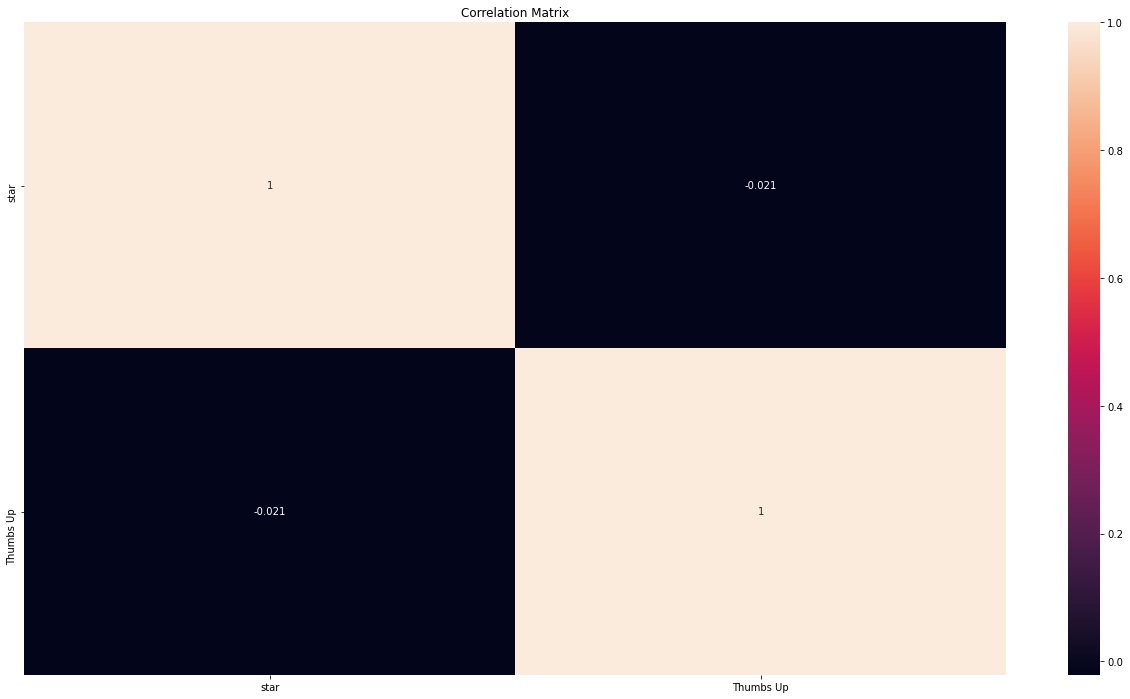

In [117]:
plt.figure(figsize=[22,12])
sns.heatmap(df2.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

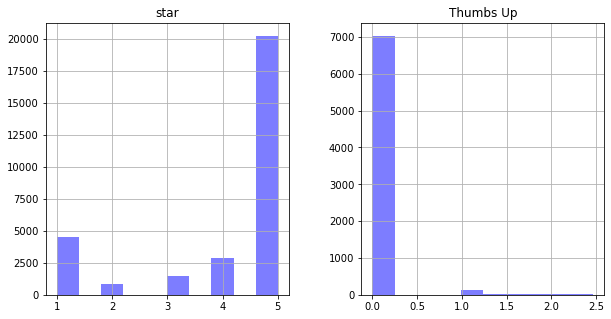

In [118]:
df2.hist(color = 'b',alpha = 0.51, figsize=(10,5))
plt.show()

<AxesSubplot:>

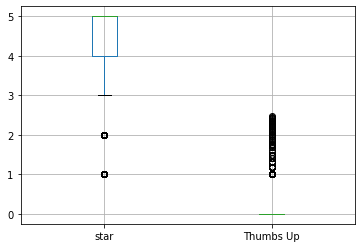

In [119]:
df2.boxplot()

In [120]:
x = df.drop(columns=['Text'],axis=1)
y = df['Text']

In [121]:
x.skew()

ID                  0.000000
Review URL          0.000000
Star               -0.635557
Thumbs Up          11.099447
User Name          -0.000256
Developer Reply   -11.916926
Version            -1.733254
Review Date         0.042614
App ID              0.000000
dtype: float64

In [122]:
df2['Thumbs Up']=np.sqrt(df['Thumbs Up'])

In [123]:
df2.skew()

star        -1.378898
Thumbs Up    7.436707
dtype: float64

In [124]:
x = df.drop(columns=['Text'],axis=1)
y = df['Text']

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [126]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.29,random_state=38)

In [128]:
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(lr,x,y,cv=5).mean())

r2 score 0.00039356373567489555
1184.5670620261888
1855782.6750552307
0.001911396065898674


In [129]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(kn,x,y,cv=5).mean())




r2 score -0.1683610936892741
1237.3094736842104
2169077.946296651
-0.1747338533021471


In [130]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(sv,x,y,cv=5).mean())

r2 score 0.0009168713181061383
1184.583994067291
1854811.1475520362
-0.0015252800005290056


In [131]:
df3 = pd.read_csv(r'C:\Users\hp\Downloads\browser_rankings_data.csv')

In [132]:
df3.head()

browser_rankings
ID Keyword Rank Country Language Date       App ID               Date of Last Description Change Short Description                                                                    Long Description
1  browser 2    in      en       2020-12-16 net.fast.web.browser 2020-12-18                      The small, fastest, secure Web Browser, best mo...  One of the smallest, fastest, secure Web Brows...
2  browser 3    in      en       2020-12-16 com.android.chrome   2020-12-18                      Fast, simple, and secure. Google Chrome browser...  Google Chrome is a fast, easy to use, and secu...
3  browser 4    in      en       2020-12-16 com.opera.browser    2021-02-27                      Fast, safe web browser: free VPN, Ad blocker, Q...  Fast, safe and private, introducing the latest...
                                                                 2020-12-18                      Fast, safe web browser: free VPN, Ad blocker, Q...  Opera is a fast, safe web browser for your And...

In [133]:
df3.shape

(3067, 1)

In [134]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3067 entries, ('ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID', 'Date of Last Description Change', 'Short Description') to ('131576', 'android browser', '5', 'in', 'en', '2021-03-06', 'com.cloudmosa.puffinTV', '2020-12-18', 'Puffin TV Browser - One App to Watch All Videos on the Web.')
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   browser_rankings  3067 non-null   object
dtypes: object(1)
memory usage: 161.1+ KB


In [106]:
df3.columns

Index(['browser_rankings'], dtype='object')

In [135]:
df3.dtypes

browser_rankings    object
dtype: object

In [136]:
df3.isnull().sum()

browser_rankings    0
dtype: int64

In [137]:
df3.describe()

,browser_rankings
count,3067
unique,14
top,Tired of being tracked online? We can help. At...
freq,370
